<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Final-Project/blob/main/Project_SVM_Random_Forest_Gradient_Boost_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import time
from datetime import timedelta

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

file_path = url = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/DS.csv'
data = pd.DataFrame(pd.read_csv(file_path))
data.head()


,Entity,Code,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),...,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Kilotons of Co2,Metric Tons Per Capita,Population Growth Rate,Unnamed: 21
0,Afghanistan,1.0,2001.0,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,...,NaN,NaN,60,652230.0,33.93911,67.709953,730.0,0.04,3.902805,NaN
1,Afghanistan,1.0,2000.0,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,...,NaN,NaN,60,652230.0,33.93911,67.709953,760.0,0.04,2.975057,NaN
2,Afghanistan,1.0,2002.0,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,...,NaN,179.426579,60,652230.0,33.93911,67.709953,1030.0,0.05,4.496719,NaN
3,Afghanistan,1.0,2004.0,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,...,1.414118,211.382074,60,652230.0,33.93911,67.709953,1030.0,0.04,4.321560,NaN
4,Afghanistan,1.0,2003.0,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,...,8.832278,190.683814,60,652230.0,33.93911,67.709953,1220.0,0.05,4.668344,NaN


In [ ]:
data = data.drop(columns=["Unnamed: 21"], errors="ignore")
data = data.drop(columns=["Entity"], errors="ignore")
data = data.replace(',', '', regex=True).astype(float)

data.head()


,Code,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Kilotons of Co2,Metric Tons Per Capita,Population Growth Rate
0,1.0,2001.0,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,NaN,NaN,60.0,652230.0,33.93911,67.709953,730.0,0.04,3.902805
1,1.0,2000.0,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,NaN,NaN,60.0,652230.0,33.93911,67.709953,760.0,0.04,2.975057
2,1.0,2002.0,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,NaN,179.426579,60.0,652230.0,33.93911,67.709953,1030.0,0.05,4.496719
3,1.0,2004.0,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,1030.0,0.04,4.321560
4,1.0,2003.0,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,1220.0,0.05,4.668344


In [ ]:

print(data.shape)
print(data.isnull().sum() * 100 / data.shape[0])
data_cleaned = data.dropna()
print(data_cleaned.shape)
print(data_cleaned.isnull().sum() * 100 / data_cleaned.shape[0])


(3649, 20)
Code                                                                 7.563716
Year                                                                 7.563716
Access to electricity (% of population)                              7.810359
Access to clean fuels for cooking                                    9.208002
Renewable energy share in the total final energy consumption (%)     8.111811
Electricity from fossil fuels (TWh)                                  8.111811
Electricity from nuclear (TWh)                                      10.852288
Electricity from renewables (TWh)                                    8.111811
Low-carbon electricity (% electricity)                               8.111811
Primary energy consumption per capita (kWh/person)                   7.563716
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          7.892573
gdp_growth                                                          15.017813
gdp_per_capita                                       

In [ ]:

print(data_cleaned.shape)
data_cleaned.head()

(2888, 20)


,Code,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Kilotons of Co2,Metric Tons Per Capita,Population Growth Rate
3,1.0,2004.0,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,1030.0,0.04,4.321560
4,1.0,2003.0,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,1220.0,0.05,4.668344
5,1.0,2005.0,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,11.229715,242.031313,60.0,652230.0,33.93911,67.709953,1550.0,0.06,3.682700
6,1.0,2006.0,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,5.357403,263.733602,60.0,652230.0,33.93911,67.709953,1760.0,0.07,2.990524
7,1.0,2007.0,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,13.826320,359.693158,60.0,652230.0,33.93911,67.709953,1770.0,0.07,2.493830


In [ ]:
Y=data_cleaned.pop("Kilotons of Co2")
Y.head()
X=data_cleaned
X.head()

,Code,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Metric Tons Per Capita,Population Growth Rate
3,1.0,2004.0,20.064968,10.90,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1.414118,211.382074,60.0,652230.0,33.93911,67.709953,0.04,4.321560
4,1.0,2003.0,14.738506,9.50,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,8.832278,190.683814,60.0,652230.0,33.93911,67.709953,0.05,4.668344
5,1.0,2005.0,25.390894,12.20,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,11.229715,242.031313,60.0,652230.0,33.93911,67.709953,0.06,3.682700
6,1.0,2006.0,30.718690,13.85,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,5.357403,263.733602,60.0,652230.0,33.93911,67.709953,0.07,2.990524
7,1.0,2007.0,36.051010,15.30,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,13.826320,359.693158,60.0,652230.0,33.93911,67.709953,0.07,2.493830


In [ ]:

scaler = StandardScaler()
X = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y , train_size = 0.8, test_size = 0.2, random_state = 100)


585021.0828345595


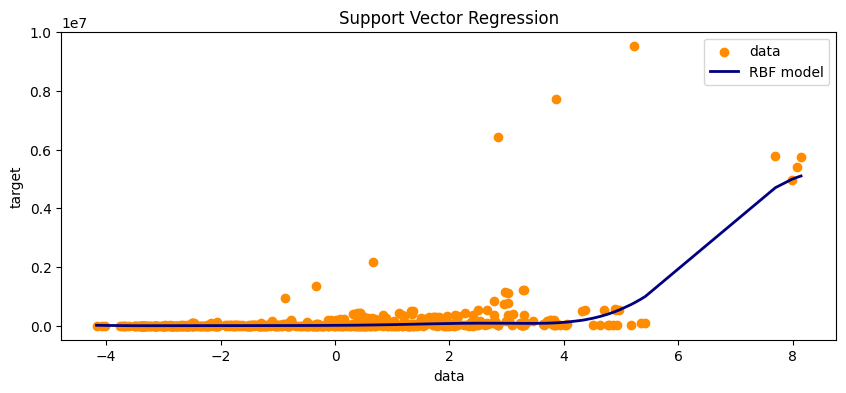

In [ ]:
pca = PCA(n_components=1)
principalDf = pd.DataFrame(data = pca.fit_transform(X))
X_train, X_test, Y_train, Y_test = train_test_split(principalDf.values, Y, train_size = 0.8, test_size = 0.2, random_state = 5)
svr_rbf = SVR(kernel='rbf', C=1e6,gamma=0.1)
#svr_lin = SVR(kernel='linear', C=5)
#svr_poly = SVR(kernel='poly', C=5, degree=2)

Y_rbf = svr_rbf.fit(X_train, Y_train)


Y_rbf =Y_rbf.predict(X_test)
#y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
#y_poly = svr_poly.fit(x_train, y_train).predict(x_test)


X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_rbf = np.array(Y_rbf)

sorted_indices = X_test.flatten().argsort()
X_test_sorted = X_test[sorted_indices]
Y_test_sorted = Y_test[sorted_indices]
Y_rbf_sorted = Y_rbf[sorted_indices]
#y_lin_sorted = y_lin[sorted_indices]
#y_poly_sorted = y_poly[sorted_indices]
lw=2
plt.figure(figsize=(10, 4))
plt.scatter(X_test_sorted, Y_test_sorted, color='darkorange', label='data')
plt.plot(X_test_sorted, Y_rbf_sorted, color='navy', lw=lw, label='RBF model')
#plt.plot(x_test_sorted, y_lin_sorted, color='c', lw=lw, label='Linear model')
#plt.plot(x_test_sorted, y_poly_sorted, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()

mse_rbf = mean_squared_error(Y_test,Y_rbf)
rmse_rbf = np.sqrt(mse_rbf)
print(rmse_rbf)

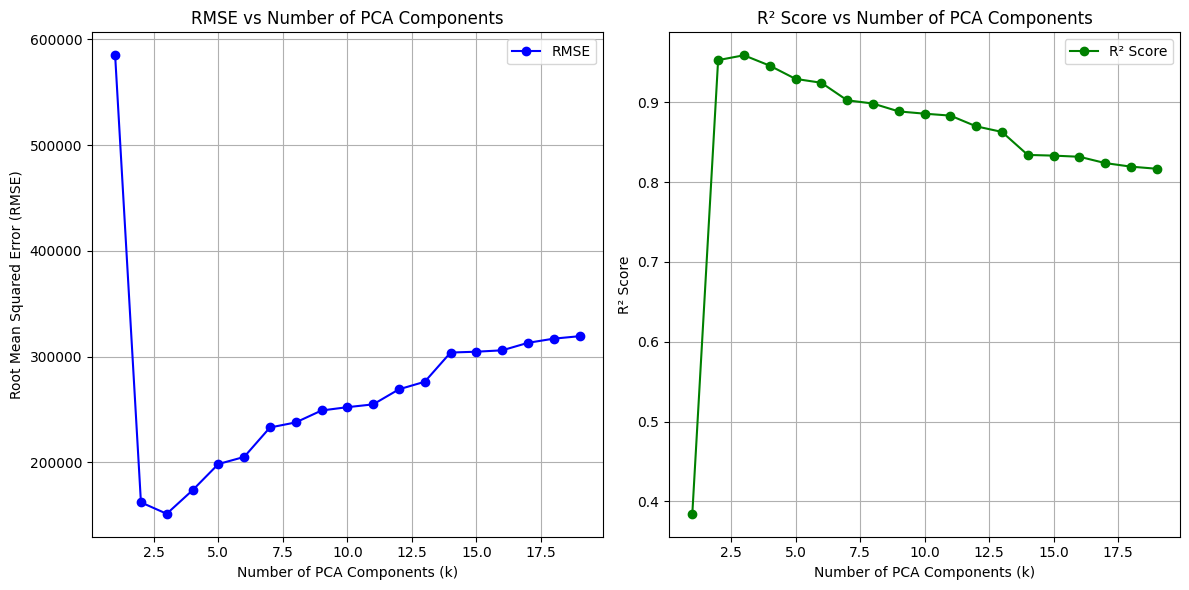

In [ ]:
rmse_values = []
r2_scores = []
k_values = range(1, 20)

for k in k_values:
    pca = PCA(n_components=k)
    principalDf = pd.DataFrame(data=pca.fit_transform(X))
    X_train, X_test, Y_train, Y_test = train_test_split(
        principalDf.values, Y, train_size=0.8, test_size=0.2, random_state=5
    )
    svr_rbf = SVR(kernel='rbf', C=1e6, gamma=0.1)
    svr_rbf.fit(X_train, Y_train)
    Y_rbf = svr_rbf.predict(X_test)

    mse_rbf = mean_squared_error(Y_test, Y_rbf)
    rmse_rbf = np.sqrt(mse_rbf)
    rmse_values.append(rmse_rbf)

    r2 = r2_score(Y_test, Y_rbf)
    r2_scores.append(r2)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b', label='RMSE')
plt.xlabel('Number of PCA Components (k)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs Number of PCA Components')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='o', linestyle='-', color='g', label='R² Score')
plt.xlabel('Number of PCA Components (k)')
plt.ylabel('R² Score')
plt.title('R² Score vs Number of PCA Components')
plt.legend()
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()


151273.44241373028
0.9588414665542784
Training time : 0:00:00.829943


Text(0, 0.5, 'Predicted')

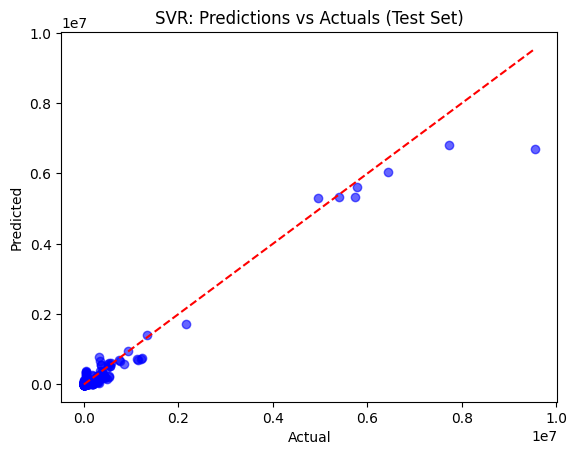

In [ ]:
pca = PCA(n_components=3)
principalDf = pd.DataFrame(data = pca.fit_transform(X))
X_train, X_test, Y_train, Y_test = train_test_split(principalDf.values, Y, train_size = 0.8, test_size = 0.2, random_state = 5)
svr_rbf = SVR(kernel='rbf', C=1e6,gamma=0.1)

start_time = time.time()
Y_rbf = svr_rbf.fit(X_train, Y_train)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))
Y_rbf =Y_rbf.predict(X_test)
mse_rbf = mean_squared_error(Y_test,Y_rbf)
rmse_rbf = np.sqrt(mse_rbf)
print(rmse_rbf)
test_r2 = r2_score(Y_test,Y_rbf)
print(test_r2)
print(f"Training time : {formatted_time}")
# Plot predictions vs actual values for the test set
plt.scatter(Y_test, Y_rbf, color='blue', alpha=0.6)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--')
plt.title("SVR: Predictions vs Actuals (Test Set)")
plt.xlabel("Actual")
plt.ylabel("Predicted")

Training RMSE: 12010.143223686078
Testing RMSE: 33201.34231193481
Training R^2: 0.9997914097361379
Testing R^2: 0.9980173511771074
Training time : 0:00:05.276542


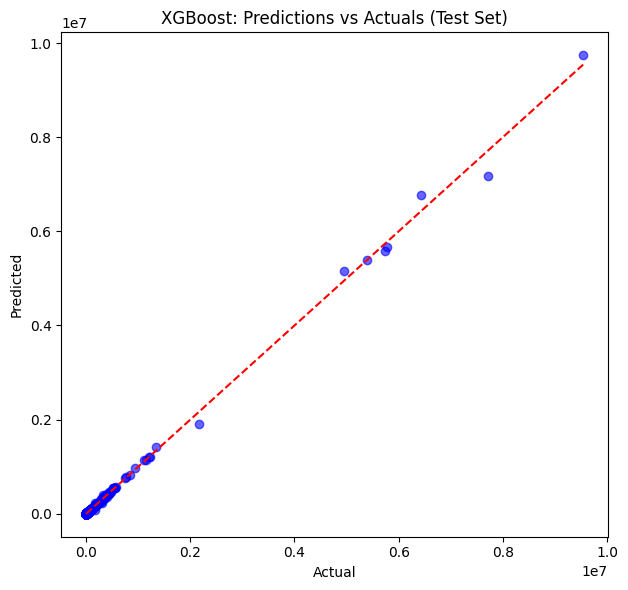

In [ ]:
#XGboost
!pip install xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import time
from datetime import timedelta


file_path = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/DS.csv'
data = pd.read_csv(file_path)


data = data.drop(columns=["Unnamed: 21"], errors="ignore")
data = data.drop(columns=["Entity"], errors="ignore")
data = data.replace(',', '', regex=True).astype(float)


data_cleaned = data.dropna()


Y = data_cleaned.pop("Kilotons of Co2")
X = data_cleaned


x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=5)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=10,
    alpha=0.5,
    reg_lambda=5,
    subsample=0.9,
    colsample_bytree=0.8
)



start_time = time.time()

xgb_model.fit(x_train_scaled, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))


y_train_pred = xgb_model.predict(x_train_scaled)
y_test_pred = xgb_model.predict(x_test_scaled)


train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)


test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)


print(f"Training RMSE: {train_rmse}")
print(f"Testing RMSE: {test_rmse}")
print(f"Training R^2: {train_r2}")
print(f"Testing R^2: {test_r2}")
print(f"Training time : {formatted_time}")
# Visualize the results
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("XGBoost: Predictions vs Actuals (Test Set)")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


Random Forest Results:
Training RMSE: 27109.37975317336
Testing RMSE: 43734.266609571445
Training R^2: 0.9989372360285208
Testing R^2: 0.9965598434358899
Training time : 0:00:01.287972


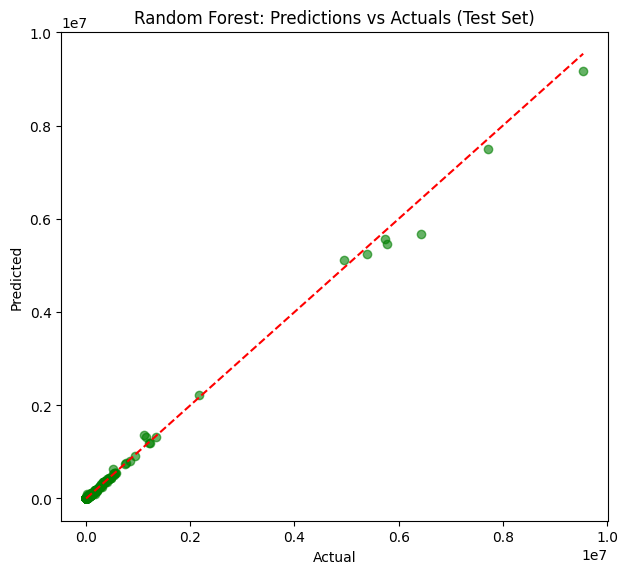

In [ ]:
# Random forrest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import time
from datetime import timedelta


file_path = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/DS.csv'
data = pd.read_csv(file_path)

data = data.drop(columns=["Unnamed: 21"], errors="ignore")
data = data.drop(columns=["Entity"], errors="ignore")
data = data.replace(',', '', regex=True).astype(float)


data_cleaned = data.dropna()


Y = data_cleaned.pop("Kilotons of Co2")
X = data_cleaned


x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=5)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=5,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
)


start_time = time.time()
rf_model.fit(x_train_scaled, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))


y_train_pred_rf = rf_model.predict(x_train_scaled)
y_test_pred_rf = rf_model.predict(x_test_scaled)


train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("Random Forest Results:")
print(f"Training RMSE: {train_rmse_rf}")
print(f"Testing RMSE: {test_rmse_rf}")
print(f"Training R^2: {train_r2_rf}")
print(f"Testing R^2: {test_r2_rf}")
print(f"Training time : {formatted_time}")

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_rf, color='green', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Random Forest: Predictions vs Actuals (Test Set)")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()


Gradient Boosting Regression Results:
Training RMSE: 1282.644212635626
Testing RMSE: 36651.95854779636
Training R^2: 0.9999976209143779
Testing R^2: 0.9975838222245995
Training time : 0:00:01.565661


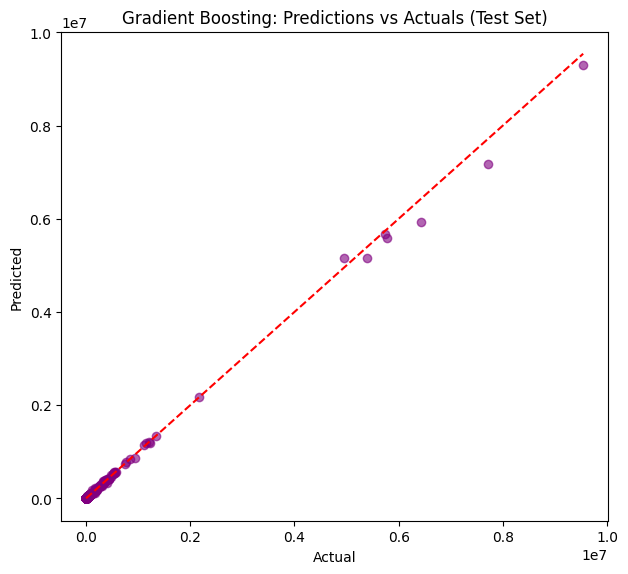

In [ ]:
# Gradient Boosting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import time
from datetime import timedelta


file_path = 'https://raw.githubusercontent.com/Ahmed-M-Elshazly/Database/main/DS.csv'
data = pd.read_csv(file_path)


data = data.drop(columns=["Unnamed: 21"], errors="ignore")
data = data.drop(columns=["Entity"], errors="ignore")
data = data.replace(',', '', regex=True).astype(float)


data_cleaned = data.dropna()


Y = data_cleaned.pop("Kilotons of Co2")
X = data_cleaned


x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=5)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=5,
    subsample=0.9,
    max_features='sqrt'
)


start_time = time.time()
gbr_model.fit(x_train_scaled, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
formatted_time = str(timedelta(seconds=elapsed_time))



y_train_pred_gbr = gbr_model.predict(x_train_scaled)
y_test_pred_gbr = gbr_model.predict(x_test_scaled)


train_rmse_gbr = np.sqrt(mean_squared_error(y_train, y_train_pred_gbr))
test_rmse_gbr = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr))
train_r2_gbr = r2_score(y_train, y_train_pred_gbr)
test_r2_gbr = r2_score(y_test, y_test_pred_gbr)


print("Gradient Boosting Regression Results:")
print(f"Training RMSE: {train_rmse_gbr}")
print(f"Testing RMSE: {test_rmse_gbr}")
print(f"Training R^2: {train_r2_gbr}")
print(f"Testing R^2: {test_r2_gbr}")
print(f"Training time : {formatted_time}")

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_gbr, color='purple', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Gradient Boosting: Predictions vs Actuals (Test Set)")
plt.xlabel("Actual")
plt.ylabel("Predicted")


plt.tight_layout()
plt.show()
